# thinking1

# thinking2

# thinking3

# thinking4

# 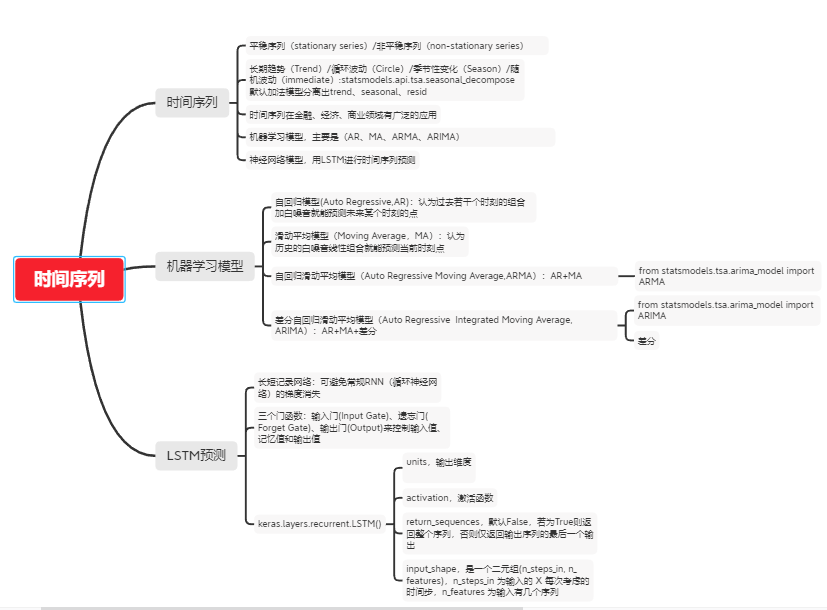

# action1

In [3]:
#获取指定城市的地铁路线
import requests
from bs4 import BeautifulSoup
def get_page_content(request_url):
    #得到内容
    header={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
    html = requests.get(request_url,headers = header,timeout = 10)
    content = html.text
    #print(content)
    #通过content创建BS对象
    soup = BeautifulSoup(content,'html.parser',from_encoding = 'utf-8')
    return soup
request_url = 'https://ditie.mapbar.com/beijing_line/'
soup = get_page_content(request_url)

F:\Anaconda\lib\site-packages\bs4\__init__.py:185: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [7]:
import pandas as pd
subways = soup.find_all('div',class_ = 'station')
df = pd.DataFrame(columns = ['name','site'])
for subway in subways:
    #得到线路名称
    route_name = subway.find('strong',class_='bolder').text
    #找到该线路中，每一站的名称
    routes = subway.find('ul')
    routes = subway.find_all('a')
    for route in routes:
        temp = {'name':route.text,'site':route_name}
        df  = df.append(temp,ignore_index = True)
        #print(route.text)
print(df)

         name    site
0    地铁八通线线路图   地铁八通线
1         四惠站   地铁八通线
2        四惠东站   地铁八通线
3        高碑店站   地铁八通线
4       传媒大学站   地铁八通线
..        ...     ...
365       永丰站  地铁16号线
366      永丰南站  地铁16号线
367      西北旺站  地铁16号线
368      马连洼站  地铁16号线
369       西苑站  地铁16号线

[370 rows x 2 columns]


In [8]:
df['city'] = '北京'
df.to_excel('subway.xlsx',index = False)

In [11]:
#调价经度longitude纬度
def get_location(keyword,city):
    header={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
    request_url = 'http://restapi.amap.com/v3/place/text?key=35fc3e2f362fa1eeec425f4468f2452b&keywords='+\
        keyword+'types=&city='+city+'children=1&offset=1&page=1&extensions=all'
    data = requests.get(request_url,headers = header)
    data.encoding = 'utf-8'
    data = data.text
    print(data)
get_location('五道口站','北京')

{"info":"INVALID_REQUEST","infocode":"10026","status":"0","sec_code_debug":"d41d8cd98f00b204e9800998ecf8427e","key":"35fc3e2f362fa1eeec425f4468f2452b","sec_code":"d41d8cd98f00b204e9800998ecf8427e"}
